# MLP image classification using the Fashion MNIST dataset
We will train and evaluate an MLP on the Fashion MNIST dataset. It consists of 70.000 grayscale images of 28x28 pixels each, and there are 10 classes.

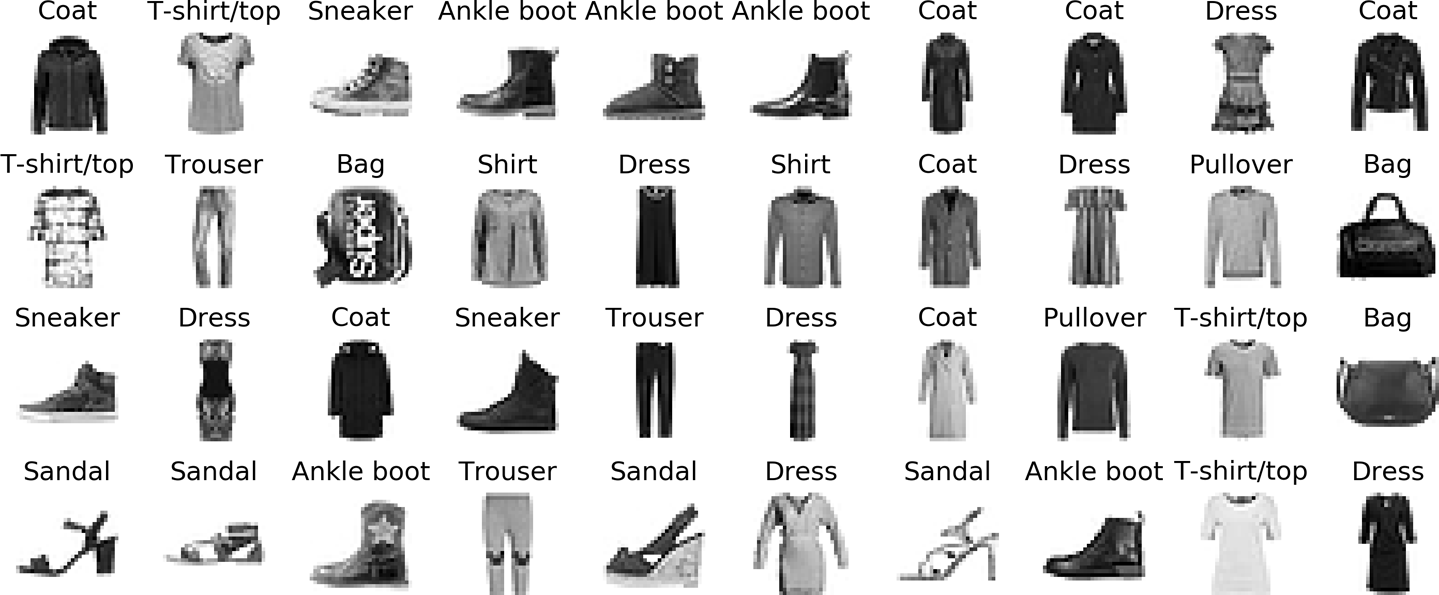

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data
Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Show the size and dimension of the dataset.
X_train_full.shape

(60000, 28, 28)

In [4]:
# Each pixel intensity is represented as a byte (0 to 255).
X_train_full.dtype

dtype('uint8')

In [5]:
# Split the full training set into a validation set and a (smaller) training set,
# and scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

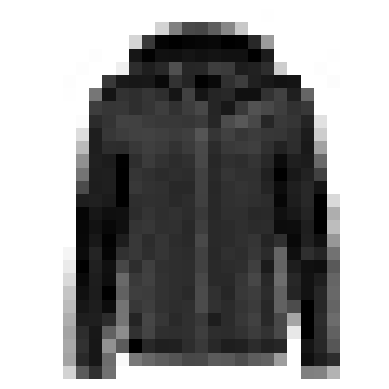

In [9]:
#Plot an image using Matplotlib's imshow() function, with a binary color map:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
# The labels are the class IDs (represented as uint8), from 0 to 9.
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# Show the name of the first image in the training set.
class_names[y_train[0]]

'Coat'

## Create a model using the Sequential API

In [13]:
model = keras.models.Sequential()
# Input layer:
# A "Flatten" layer converts each input image into a 1-dimensional array.
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden layers:
# A dense layer is fully connected.
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer.
# The layer contains one neuron per class (i.e. 10).
# Since it is multiclass classification, we should use the softmax activation function.
# It will ensure that the estimated probabilities are between 0 and 1, and that the sum
# of estimated probabilities for one prediction is 1.
# (for binary classification we would have a single output neuron using the logistic activation function).
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/hk/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Alternative syntax:
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])

### Show information about the model

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[-0.04444533,  0.04844107,  0.03609396, ...,  0.03760285,
        -0.0644131 ,  0.02020144],
       [-0.0491125 , -0.04465363, -0.00641859, ...,  0.06032066,
        -0.05206289, -0.02283594],
       [ 0.04307673, -0.06790134,  0.03853687, ...,  0.00525663,
         0.01762075, -0.00746416],
       ...,
       [ 0.05377452, -0.00048188, -0.03374233, ...,  0.01970633,
        -0.05181995,  0.05075786],
       [-0.07331797,  0.02985249, -0.04062267, ...,  0.03464267,
         0.02475131,  0.05507441],
       [ 0.04786546,  0.00026399,  0.02570257, ...,  0.05993195,
         0.03276408, -0.01997531]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

## Compile the model
You must at least specify the loss function and the optimizer to use. You can also specify a list of additional metrics to use during training and evaluation.

In [22]:
# "sparse_categorical_crossentropy" is the loss function to use for classification when the classes are exclusive.
# "sgd" means Stochastic Gradient Descent.
# "accuracy" enables us to measure the accuracy during training and evaluation.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Train the model

In [23]:
# Keras will measure the loss and the extra metrics on the validation set at the end of each epoch.
# The default number of epochs is 1, which is not enough for a good result.
# The default batch-size is 32 instances. Since one batch is presented for each training pass (or step),
# and the training set contains 55.000 instances, we get 1719 passes per epoch.
# If you want to train more later, you can just call the fit() method again, since Keras just continues
# training where it left off.

history = model.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.6893 - loss: 0.9706 - val_accuracy: 0.8202 - val_loss: 0.5309
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8250 - loss: 0.5016 - val_accuracy: 0.8424 - val_loss: 0.4663
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8406 - loss: 0.4499 - val_accuracy: 0.8498 - val_loss: 0.4318
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.8519 - loss: 0.4205 - val_accuracy: 0.8594 - val_loss: 0.4076
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8600 - loss: 0.3994 - val_accuracy: 0.8648 - val_loss: 0.3905
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.8656 - loss: 0.3826 - val_accuracy: 0.8676 - val_loss: 0.3778
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.8695 - loss: 0.3686 - val_accuracy: 0.8684 - val_loss: 0.3686
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.8729 -

In [24]:
# The fit() method returns a history object with information about the result of the training.
history.params

{'verbose': 'auto', 'epochs': 40, 'steps': 1719}

In [25]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

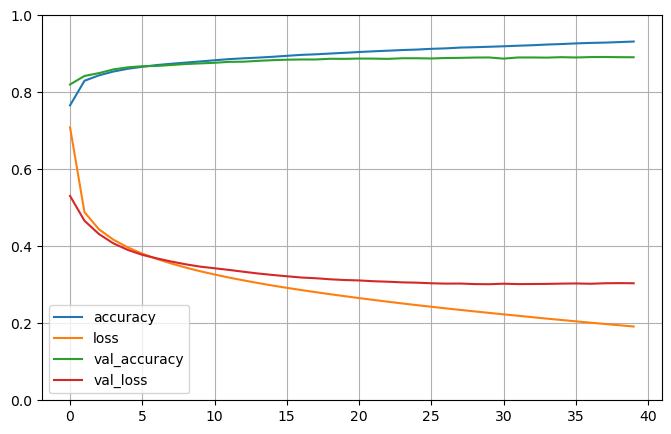

In [27]:
# Show the learning curves.
# (The training curves should be shifted half an epoch to the left to be completely comparable with
# the validation curves).

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model.

In [28]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8810 - loss: 0.3451


[0.34230008721351624, 0.8817999958992004]

In [29]:
# Make predictions on the whole test set.
# You will see that this predict method returns an array of class probabilities for 
# each prediction.
y_proba = model.predict(X_test)
y_proba.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [30]:
# Confusion matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# First convert y_proba to an array where each element is the most probable class from
# each prediction.
y_pred=np.argmax(y_proba,axis=1)

confusion_matrix(y_test, y_pred)

array([[774,   2,  45,  17,   5,   2, 146,   0,   9,   0],
       [  4, 973,   2,  13,   4,   0,   3,   0,   1,   0],
       [ 10,   1, 879,   5,  69,   0,  35,   0,   1,   0],
       [ 13,  14,  38, 845,  55,   0,  30,   0,   5,   0],
       [  2,   1, 118,  13, 829,   0,  36,   0,   1,   0],
       [  0,   0,   0,   1,   0, 961,   0,  19,   2,  17],
       [ 68,   3, 134,  20,  77,   0, 689,   0,   9,   0],
       [  0,   0,   0,   0,   0,  21,   0, 944,   1,  34],
       [  4,   0,   9,   5,   7,   4,   4,   3, 964,   0],
       [  1,   0,   0,   0,   0,   7,   0,  32,   0, 960]])

In [31]:
# Precision
precision_score(y_test, y_pred, average=None)

array([0.88356164, 0.97887324, 0.71755102, 0.91947769, 0.79254302,
       0.96582915, 0.73064687, 0.94589178, 0.97079557, 0.9495549 ])

In [32]:
# Recall
recall_score(y_test, y_pred, average=None)

array([0.774, 0.973, 0.879, 0.845, 0.829, 0.961, 0.689, 0.944, 0.964,
       0.96 ])

In [33]:
# Make predictions with probabilities for the first 3 instances in the test set.
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
# Check if the predictions were correct.
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [35]:
# Show the class names
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')